# Graphes en machine learning

Ce notebook propose une série de graphes qu'on utilise fréquemment dans un notebook.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [182]:
import pyensae
%nb_menu

Le module utilise des données issue de [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) pour lequel on essaye de prédire la qualité du vin en fonction de ses caractéristiques chimiques.

In [10]:
import pyensae
pyensae.download_data("winequality-red.csv", url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/")
pyensae.download_data("winequality-white.csv", url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/")

    downloading of  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv  to  winequality-red.csv
    downloading of  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv  to  winequality-white.csv


'winequality-white.csv'

In [11]:
%head winequality-red.csv

In [16]:
import pandas
red_wine = pandas.read_csv("winequality-red.csv", sep=";")
white_wine = pandas.read_csv("winequality-white.csv", sep=";")
wines = pandas.concat([red_wine, white_wine])
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


On découpe en base d'apprentissage, base de test :

In [139]:
from sklearn.cross_validation import train_test_split
X = wines[[c for c in wines.columns if c != "quality"]]
Y = wines["quality"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
type(x_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [27]:
wines.shape, x_train.shape, y_train.shape

((6497, 12), (4352, 11), (4352,))

## Exploration

### histogrammes

fonction [hist](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AC5B9E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C57DF98>]], dtype=object)

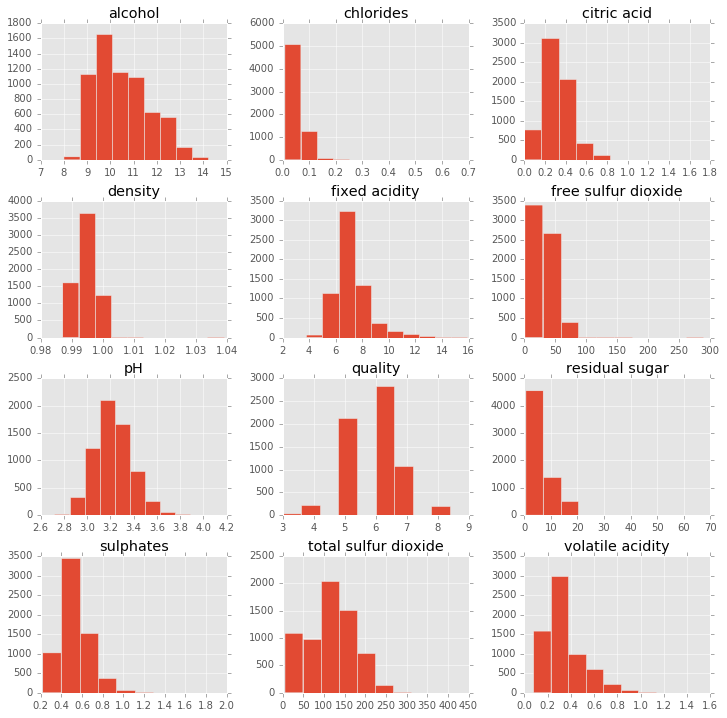

In [21]:
wines.hist(figsize=(12,12))

### corrélations

fonction [pairplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)

c:\python34_x64\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


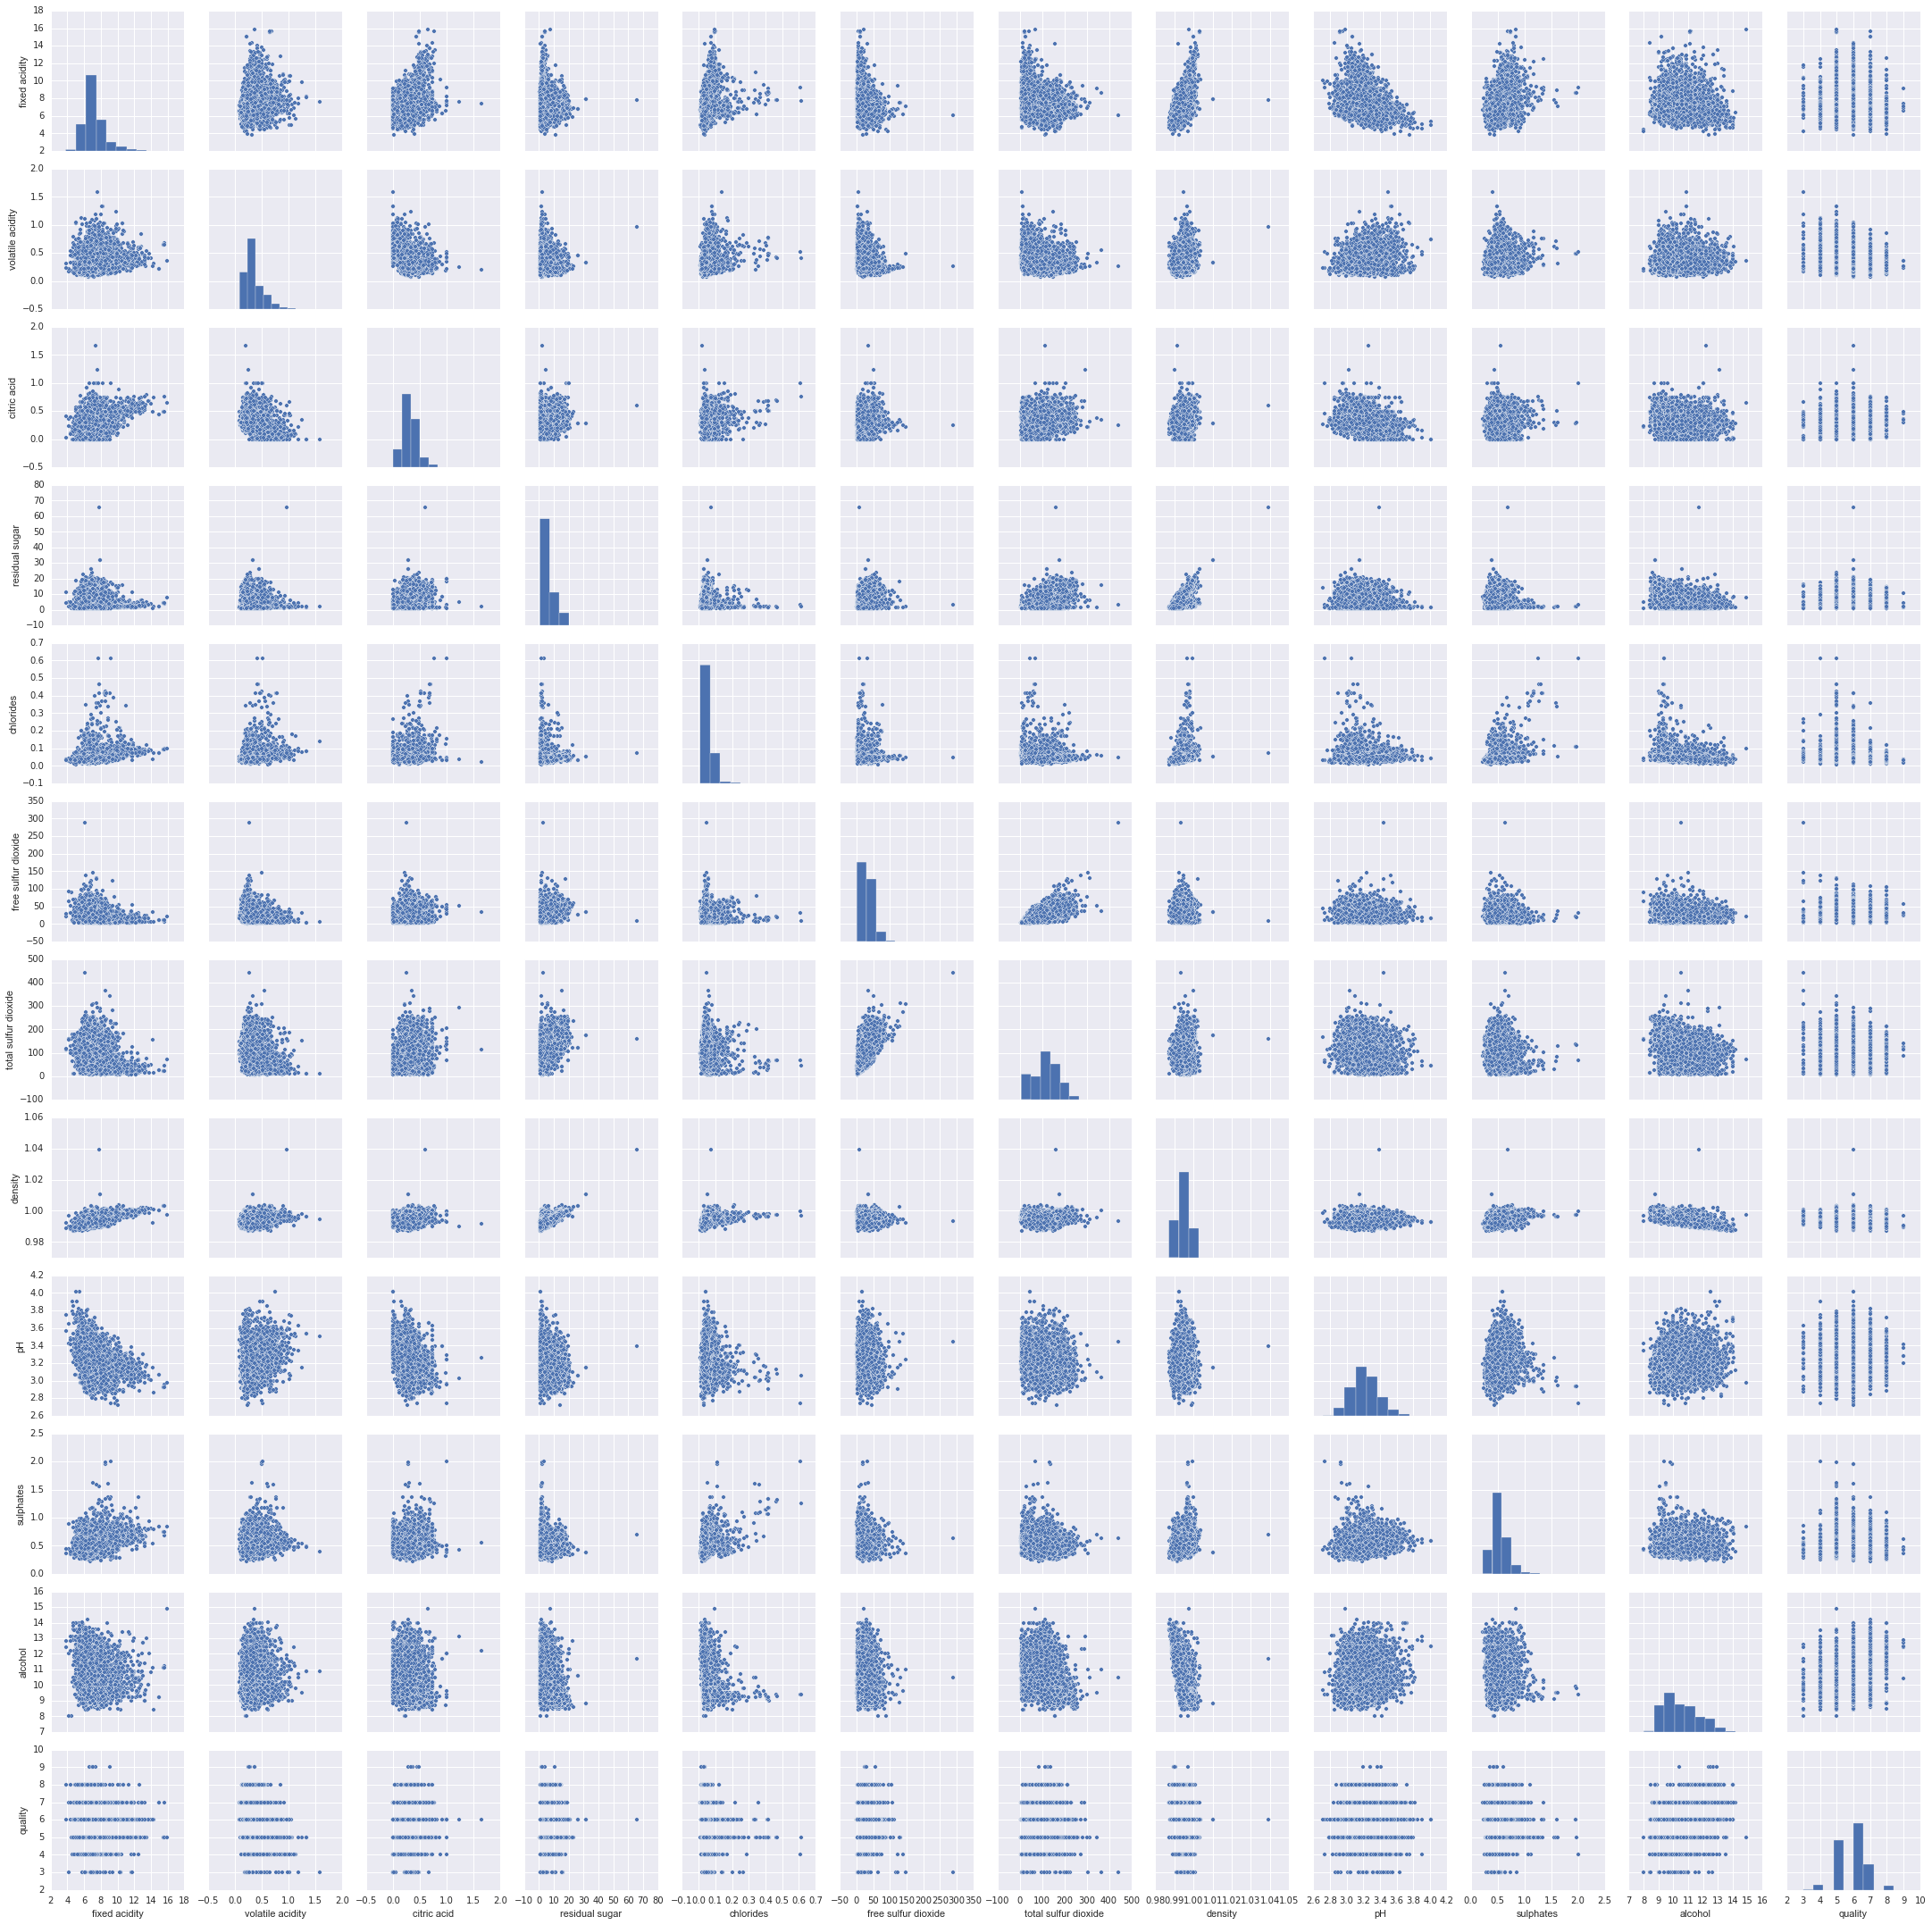

In [23]:
import seaborn
seaborn.pairplot(wines)

fonction [clustermap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.clustermap.html)

c:\python34_x64\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


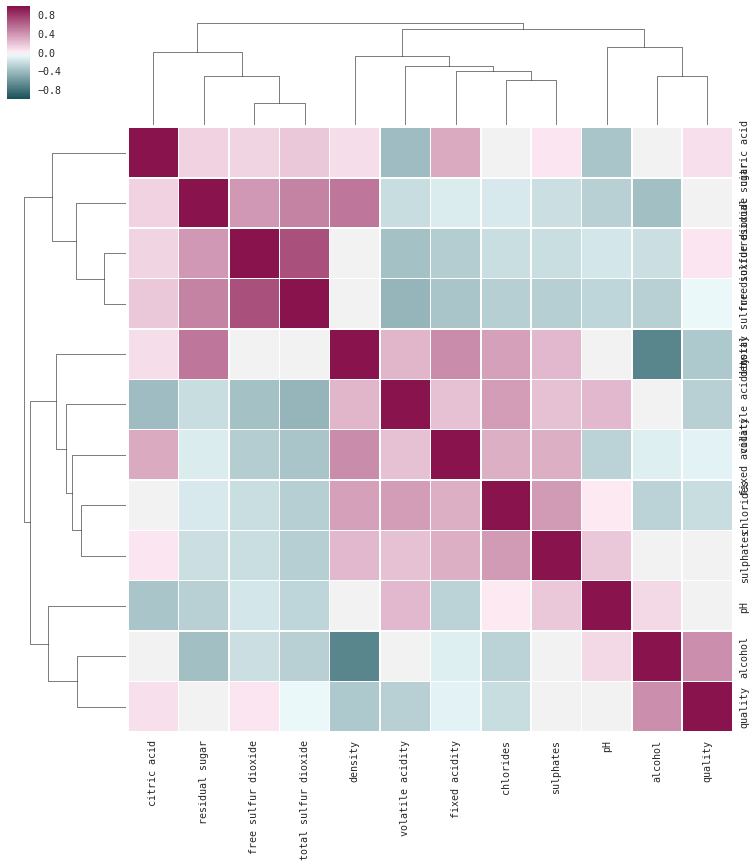

In [24]:
import seaborn
seaborn.set(font="monospace")
cmap = seaborn.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
seaborn.clustermap(wines.corr(), linewidths=.5, figsize=(13, 13), cmap=cmap)

## Courbe ROC

La courbe ROC est utilisée pour comparer des classifieurs. Pour le jeu [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality), on essaye de prédire la note de l'expert qui est discrète et qui va de 1 à 9. On utilise l'exemple présent à la page [Decisions Trees](http://scikit-learn.org/stable/modules/tree.html) et un autre modèle [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [100]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10)
clf1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [111]:
from sklearn.ensemble import AdaBoostClassifier
clf2 = AdaBoostClassifier(clf1,
                         algorithm='SAMME',
                         n_estimators=800,
                         learning_rate=0.5)
clf2.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
          learning_rate=0.5, n_estimators=800, random_state=None)

On a besoin de spécifier le paramètre *min_samples_leaf* pour éviter de n'avoir qu'un élément dans chaque feuille de l'arbre. Ce n'est souvent pas très bon en terme de généralisation et l'arbre de décision retourne des probabilités de classification égale à 1.

In [112]:
clf1.classes_, "nb classes", len(clf1.classes_)

(array([3, 4, 5, 6, 7, 8, 9], dtype=int64), 'nb classes', 7)

In [113]:
clf2.classes_, "nb classes", len(clf2.classes_)

(array([3, 4, 5, 6, 7, 8, 9], dtype=int64), 'nb classes', 7)

Il n'y a aucune note en desous de 3 ou au-dessus de 9 dans la base d'apprentissage.

### matrice de confusion

avec la fonction [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [114]:
from sklearn.metrics import confusion_matrix
y_pred = clf1.predict(x_test)
conf = confusion_matrix(y_test, y_pred)
conf

array([[  0,   0,   4,   6,   0,   0,   0],
       [  0,   1,  38,  33,   4,   0,   0],
       [  0,   4, 388, 239,  40,   1,   0],
       [  0,   6, 271, 586, 110,   4,   0],
       [  0,   0,  40, 166, 141,   5,   0],
       [  0,   0,   4,  27,  20,   6,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

In [115]:
y_pred = clf2.predict(x_test)
conf = confusion_matrix(y_test, y_pred)
conf

array([[  0,   0,   5,   4,   1,   0,   0],
       [  2,  14,  44,  16,   0,   0,   0],
       [  1,  10, 488, 162,  10,   1,   0],
       [  0,   5, 202, 694,  70,   6,   0],
       [  0,   0,   2, 141, 205,   4,   0],
       [  0,   0,   0,  14,  25,  18,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

### courbe ROC avec decision_function

voir [plot_roc](http://scikit-learn.org/stable/auto_examples/plot_roc.html)

On superpose deux courbes ROC obtenue pour deux classes différentes : un vin de la classe *A* est bien classée si le modèle prédit *A*, il est mal classé s'il ne prédit pas *A*. Tout d'abord une courbe ROC s'appuie sur le score que retourne le classifieur avec la méthode *decision_function* excepté lorsque le modèle en question ne l'implémente pas. On ruse un peu pour construire un score :

In [126]:
y_pred = clf2.predict(x_test)
y_prob = clf2.decision_function(x_test)
y_min = y_pred.min()
import numpy
y_score = numpy.array( [y_prob[i,p-y_min] for i,p in enumerate(y_pred)] ) 
y_score[:5], y_pred[:5], y_prob[:5,:]

(array([ 0.4662121 ,  0.55488612,  0.54934643,  0.46934623,  0.42632079]),
 array([6, 5, 7, 5, 5], dtype=int64),
 array([[ 0.02024515,  0.02993997,  0.10688515,  0.4662121 ,  0.21758708,
          0.14801946,  0.0111111 ],
        [ 0.00876131,  0.1241618 ,  0.55488612,  0.27979645,  0.02731747,
          0.00507685,  0.        ],
        [ 0.        ,  0.00997567,  0.03255889,  0.15849289,  0.54934643,
          0.151224  ,  0.09840211],
        [ 0.00379741,  0.06117555,  0.46934623,  0.38705638,  0.06229914,
          0.00754722,  0.00877808],
        [ 0.05379125,  0.24102967,  0.42632079,  0.23997856,  0.03374546,
          0.00513426,  0.        ]]))

On crée les courbes ROC pour chacune des classes :

In [127]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
nb_obs = dict()

for i in clf2.classes_:
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])
    nb_obs[i] = (y_test == i).sum()
    
roc_auc, nb_obs

({3: 0.19882903981264635,
  4: 0.328635750807662,
  5: 0.58597008049655708,
  6: 0.47670479241738051,
  7: 0.47871615626426001,
  8: 0.40642434630637897,
  9: 0.23460820895522383},
 {3: 10, 4: 76, 5: 672, 6: 977, 7: 352, 8: 57, 9: 1})

On ajoute une dernière courbe ROC pour savoir si un élément est bien classé ou pas en balayant toutes les classes :

In [121]:
i = "all"
fpr[i], tpr[i], _ = roc_curve(y_test == y_pred, y_score)
roc_auc[i] = auc(fpr[i], tpr[i])
nb_obs[i] = (y_test == y_pred).sum()

roc_auc, nb_obs

({'all': 0.742770779095976,
  3: 0.19882903981264635,
  4: 0.328635750807662,
  5: 0.58597008049655708,
  6: 0.47670479241738051,
  7: 0.47871615626426001,
  8: 0.40642434630637897,
  9: 0.23460820895522383},
 {'all': 1419, 3: 10, 4: 76, 5: 672, 6: 977, 7: 352, 8: 57, 9: 1})

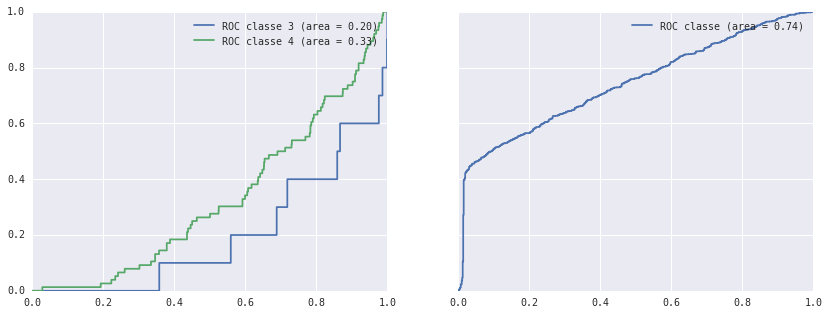

In [122]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(14,5), sharey=True)
for cl in (3,4):
    axes[0].plot(fpr[cl], tpr[cl], label='ROC classe %d (area = %0.2f)' % (cl, roc_auc[cl]))
for cl in ("all",):
    axes[1].plot(fpr[cl], tpr[cl], label='ROC classe (area = %0.2f)' % (roc_auc[cl]))
axes[0].legend()
axes[1].legend()

### courbe ROC avec predict_proba

voir [plot_roc](http://scikit-learn.org/stable/auto_examples/plot_roc.html), on l'applique à l'arbre de décision

In [128]:
y_pred = clf1.predict(x_test)
y_prob = clf1.predict_proba(x_test)
y_min = y_pred.min()
import numpy
y_score = numpy.array( [y_prob[i,p-y_min] for i,p in enumerate(y_pred)] ) 
y_score[:5]

array([ 0.        ,  0.1875    ,  0.38461538,  0.08333333,  0.26666667])

On crée les courbes ROC pour chacune des classes :

In [129]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
nb_obs = dict()

for i in clf1.classes_:
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])
    nb_obs[i] = (y_test == i).sum()
    
roc_auc, nb_obs

({3: 0.60873536299765807,
  4: 0.49268334562845006,
  5: 0.49088301732777295,
  6: 0.50902477881689823,
  7: 0.50221505349084827,
  8: 0.47249109363446928,
  9: 0.23460820895522388},
 {3: 10, 4: 76, 5: 672, 6: 977, 7: 352, 8: 57, 9: 1})

On ajoute une dernière courbe ROC pour savoir si un élément est bien classé ou pas :

In [130]:
i = "all"
fpr[i], tpr[i], _ = roc_curve(y_test == y_pred, y_score)
roc_auc[i] = auc(fpr[i], tpr[i])
nb_obs[i] = (y_test == y_pred).sum()

roc_auc, nb_obs

({'all': 0.47270749586602623,
  3: 0.60873536299765807,
  4: 0.49268334562845006,
  5: 0.49088301732777295,
  6: 0.50902477881689823,
  7: 0.50221505349084827,
  8: 0.47249109363446928,
  9: 0.23460820895522388},
 {'all': 1122, 3: 10, 4: 76, 5: 672, 6: 977, 7: 352, 8: 57, 9: 1})

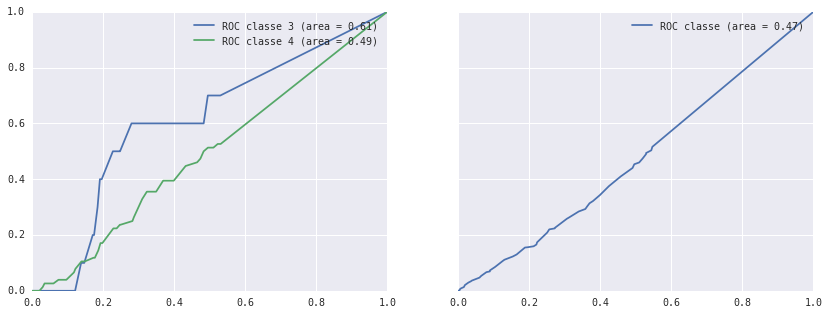

In [131]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(14,5), sharey=True)
for cl in (3,4):
    axes[0].plot(fpr[cl], tpr[cl], label='ROC classe %d (area = %0.2f)' % (cl, roc_auc[cl]))
for cl in ("all",):
    axes[1].plot(fpr[cl], tpr[cl], label='ROC classe (area = %0.2f)' % (roc_auc[cl]))
axes[0].legend()
axes[1].legend()

Voir également [scikit-learn for TMVA Users](http://betatim.github.io/posts/sklearn-for-TMVA-users/).

## Régression

In [142]:
from sklearn import linear_model
clr = linear_model.LinearRegression()
clr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### cross validation

In [143]:
from sklearn.cross_validation import cross_val_score
cross_val_score(clr, x_train, y_train, cv=10)

array([ 0.29067935,  0.30509913,  0.31099658,  0.30220651,  0.27597125,
        0.32965868,  0.29605858,  0.20011756,  0.31198912,  0.35949304])

### réprésentation des erreurs

Difficile de représentation des erreurs lorsque le problème est à plusieurs dimensions. Souvent, on trie les erreurs de façons croissantes.

In [162]:
y_pred = clr.predict(x_test)
diff = y_test * 1.0 - y_pred
diff = diff.sort_values()
diff.head()

4745   -3.858444
3307   -3.561554
740    -3.431222
2050   -2.829987
652    -2.735110
Name: quality, dtype: float64

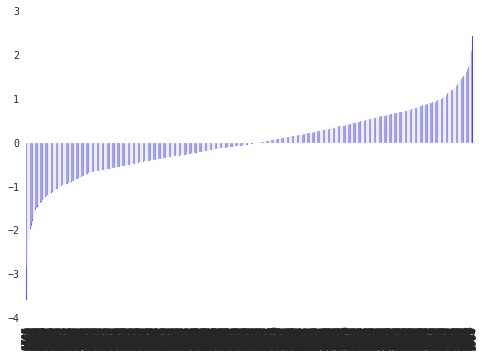

In [165]:
diff.plot(kind="bar")

L'erreur est reliée à l'aire sous la courbe.

### régression 1d et tendance

In [174]:
x_train = x_train.copy()
x_train["const"] = 1.0
x_train_1d = x_train[["alcohol","const"]]
x_train_1d.head()

,alcohol,const
101,9.4,1
3600,9.9,1
1741,12.9,1
86,9.9,1
3988,11.4,1


In [175]:
from sklearn import linear_model
clr = linear_model.LinearRegression()
clr.fit(x_train_1d, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
pred = clr.predict(x_train_1d)
graph = x_train.copy()
graph["trend"] = pred
graph["Y"] = y_train
graph.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,const,trend,Y
101,7.1,0.12,0.32,9.6,0.054,64,162,0.99620,3.40,0.41,9.4,1,5.461532,5
3600,6.8,0.12,0.30,12.9,0.049,32,88,0.99654,3.20,0.35,9.9,1,5.625772,6
1741,7.7,0.38,0.40,2.0,0.038,28,152,0.99060,3.18,0.32,12.9,1,6.611214,6
86,8.6,0.49,0.28,1.9,0.110,20,136,0.99720,2.93,1.95,9.9,1,5.625772,6
3988,6.1,0.20,0.17,1.6,0.048,46,129,0.99100,3.30,0.43,11.4,1,6.118493,6


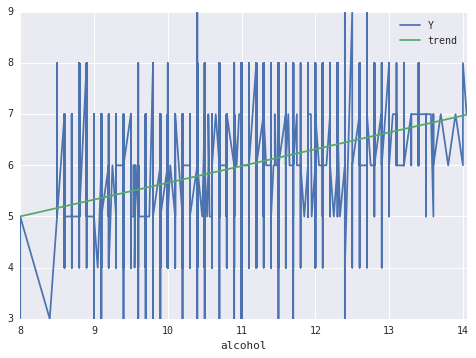

In [181]:
graph.sort_values("alcohol").plot(x="alcohol", y=["Y", "trend"])